In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('m-1.csv')
numerical_columns = df.select_dtypes(include=['int64', 'float64'])


In [3]:
# Fetch columns based on data types
def get_data(data, data_type):
    return [column for column in data.columns if data[column].dtype == data_type]

def get_category_frequency_data(df, columns):
    category_frequency = []
    print(columns)
    for column in columns:
        print(column)
        unique_categories = df[column].unique()
        for category in unique_categories:
            frequency = (df[column] == category).sum()
            category_frequency.append({'Column': column, 'Category': category, 'Frequency': frequency})
            # Create a DataFrame and sort in descending order of frequency under each column
            category_frequency_df = pd.DataFrame(category_frequency)
            category_frequency_df.sort_values(by=['Column', 'Frequency'], ascending=[True, False], inplace=True)

            # Reset index for the final DataFrame
            category_frequency_df.reset_index(drop=True, inplace=True)
    return category_frequency_df

In [4]:
all_categorical_cols = ['checking_balance', 'credit_history', 'purpose', 'savings_balance','employment_duration', 'other_credit', 'housing', 'job', 'phone']
nominal_data_cols = ['purpose', 'other_credit', 'housing', 'job', 'phone']
ordinal_col_keys = ['checking_balance', 'savings_balance', 'employment_duration', 'credit_history']

ordinal_cols = {
    'checking_balance': ['unknown', '< 0 DM', '1 - 200 DM', '> 200 DM'],
    'savings_balance': ['unknown', '< 100 DM','100 - 500 DM', '500 - 1000 DM', '> 1000 DM'],
    'employment_duration': ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years'],
    'credit_history': ['critical', 'poor', 'good', 'very good', 'perfect']
}

ordinal_encoder = OrdinalEncoder()
df[ordinal_col_keys] = ordinal_encoder.fit_transform(df[ordinal_col_keys])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   checking_balance      1000 non-null   float64
 2   months_loan_duration  1000 non-null   int64  
 3   credit_history        1000 non-null   float64
 4   purpose               1000 non-null   object 
 5   amount                1000 non-null   int64  
 6   savings_balance       1000 non-null   float64
 7   employment_duration   1000 non-null   float64
 8   percent_of_income     1000 non-null   int64  
 9   years_at_residence    1000 non-null   int64  
 10  age                   1000 non-null   int64  
 11  other_credit          1000 non-null   object 
 12  housing               1000 non-null   object 
 13  existing_loans_count  1000 non-null   int64  
 14  job                   1000 non-null   object 
 15  dependents            

In [6]:
nominal_data_cols = ['purpose', 'other_credit', 'housing', 'job', 'phone']
nominal_data = df[nominal_data_cols]


In [7]:
nominal_data.head()

,purpose,other_credit,housing,job,phone
0,furniture/appliances,none,own,skilled,yes
1,furniture/appliances,none,own,skilled,no
2,education,none,own,unskilled,no
3,furniture/appliances,none,other,skilled,no
4,car,none,other,skilled,no


In [8]:
df_nominal_encoded = pd.get_dummies(nominal_data, dtype=int)
df_encoded_ordinal = pd.concat([df, df_nominal_encoded], axis=1)
df_encoded_ordinal.drop(columns=nominal_data_cols, inplace=True)
df_encoded_ordinal['default'] = df_encoded_ordinal['default'].map({'no': 0, 'yes': 1})
get_category_frequency_data(df_encoded_ordinal, ['default'])

['default']
default


,Column,Category,Frequency
0,default,0,700
1,default,1,300


In [9]:
df_encoded_ordinal.head()

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0,1.0,6,0.0,1169,4.0,3.0,4,4,67,...,0,0,1,0,0,1,0,0,0,1
1,1,0.0,48,1.0,5951,2.0,0.0,2,2,22,...,0,0,1,0,0,1,0,0,1,0
2,2,3.0,12,0.0,2096,2.0,1.0,2,3,49,...,0,0,1,0,0,0,0,1,1,0
3,3,1.0,42,1.0,7882,2.0,1.0,2,4,45,...,0,1,0,0,0,1,0,0,1,0
4,4,1.0,24,3.0,4870,2.0,0.0,3,4,53,...,0,1,0,0,0,1,0,0,1,0


In [10]:
df_encoded_ordinal.to_csv('m-2.csv')

# Feature scaling for numerical data
<!-- months_loan_duration
amount
percent_of_income
years_at_residence
age
existing_loans_count
dependents -->
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns
<!-- numerical_cols = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents'] -->

In [11]:
numerical_columns = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']

for col in numerical_columns:
    df_encoded_ordinal[col] = np.log1p(df_encoded_ordinal[col])

for col in numerical_columns:
    df_encoded_ordinal[col].fillna(df_encoded_ordinal[col].median(), inplace=True)


print("")
df_encoded_ordinal['amount_per_duration'] = df_encoded_ordinal['amount'] / df_encoded_ordinal['months_loan_duration']

scaler = StandardScaler()
df_encoded_ordinal[numerical_columns] = scaler.fit_transform(df_encoded_ordinal[numerical_columns])


/var/folders/mb/c3qzknr92jj0tb1n5172615h0000gn/T/ipykernel_30135/2961998386.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded_ordinal[col].fillna(df_encoded_ordinal[col].median(), inplace=True)
/var/folders/mb/c3qzknr92jj0tb1n5172615h0000gn/T/ipykernel_30135/2961998386.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [12]:
df_encoded_ordinal = df_encoded_ordinal.drop(columns=['amount', 'months_loan_duration'])

In [13]:
df_encoded_ordinal.head()

,Unnamed: 0,checking_balance,credit_history,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,...,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,amount_per_duration
0,0,1.0,0.0,4.0,3.0,0.856072,0.974394,2.282879,1.124721,-0.428290,...,0,1,0,0,1,0,0,0,1,3.630568
1,1,0.0,1.0,2.0,0.0,-0.718946,-0.632789,-1.438777,-0.732558,-0.428290,...,0,1,0,0,1,0,0,1,0,2.233269
2,2,3.0,0.0,2.0,1.0,-0.718946,0.272329,1.227217,-0.732558,2.334869,...,0,1,0,0,0,0,1,1,0,2.981838
3,3,1.0,1.0,2.0,1.0,-0.718946,0.974394,0.940950,-0.732558,2.334869,...,1,0,0,0,1,0,0,1,0,2.385532
4,4,1.0,3.0,2.0,0.0,0.168058,0.974394,1.491441,1.124721,2.334869,...,1,0,0,0,1,0,0,1,0,2.637894


In [14]:
df_encoded_ordinal.to_csv('feature-scaled.csv')

## Split dataset

In [15]:
from sklearn.model_selection import train_test_split

# Separate predictors and target
X = df_encoded_ordinal.drop(columns=['default'])
y = df_encoded_ordinal['default']

# Train-test split (75-25) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [16]:
# Helper functions

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_and_get_confusion_matrix_data(model, X_train, X_test, y_train, y_test, model_name):
    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    print(f"{model_name} - Training Set Performance:")
    print(classification_report(y_train, y_train_pred))
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    print(f"{model} - Confusion Matrix (Training Set):")
    print(conf_matrix_train)

    # # Performance metrics on test data

    print("\n\n\n")
    print(f"{model_name} - Test Set Performance:")
    print(classification_report(y_test, y_test_pred))
    
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    return (conf_matrix_test, conf_matrix_train)

def plot_confusion_matrix(conf_matrix_test, conf_matrix_train, model_name):
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'],
            ax=axs[0])

    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'],
            ax=axs[1])

    plt.title(f'{model_name} - Confusion Matrix (Test Set)')
    axs[0].set_title('Confusion matrix - Test')

    axs[1].set_title('Confusion matrix - Train')
    plt.show()

## Model 1: Logistic Regression

Logistic Regression - Training Set Performance:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       525
           1       0.62      0.38      0.47       225

    accuracy                           0.75       750
   macro avg       0.70      0.64      0.65       750
weighted avg       0.73      0.75      0.72       750

LogisticRegression(max_iter=2000, random_state=42) - Confusion Matrix (Training Set):
[[474  51]
 [140  85]]




Logistic Regression - Test Set Performance:
              precision    recall  f1-score   support

           0       0.75      0.91      0.83       175
           1       0.61      0.31      0.41        75

    accuracy                           0.73       250
   macro avg       0.68      0.61      0.62       250
weighted avg       0.71      0.73      0.70       250



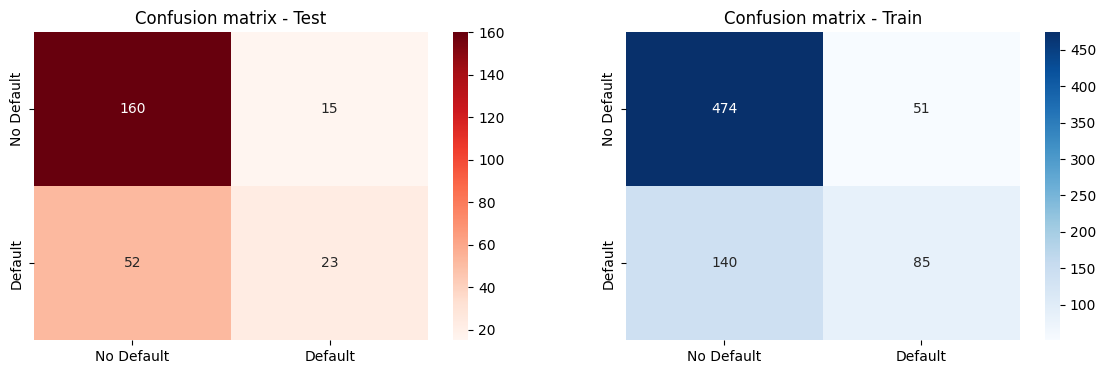

In [17]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg =  LogisticRegression(random_state=42, solver='lbfgs', max_iter=2000)
logreg = logreg.fit(X_train, y_train)
(conf_matrix_test_logreg, conf_matrix_train_logreg) = print_and_get_confusion_matrix_data(logreg, X_train, X_test, y_train, y_test, "Logistic Regression")
plot_confusion_matrix(conf_matrix_test_logreg, conf_matrix_train_logreg, "Logistic Regression")


## Model 2: Logistic Regression with SVM

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# setup the hyperparameter grid
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': [None], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# instantiate the logistic regression model
logreg_svm = LogisticRegression(max_iter=7000)

# instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg_svm, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# instantiate the logistic regression model with best parameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])
best_logreg.fit(X_train, y_train)

y_pred = best_logreg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Best Parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.732
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       175
           1       0.60      0.32      0.42        75

    accuracy                           0.73       250
   macro avg       0.68      0.61      0.62       250
weighted avg       0.71      0.73      0.70       250



## Model 3: QDA

QDA - Training Set Performance:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       525
           1       0.63      0.56      0.59       225

    accuracy                           0.77       750
   macro avg       0.72      0.71      0.72       750
weighted avg       0.76      0.77      0.77       750

QuadraticDiscriminantAnalysis() - Confusion Matrix (Training Set):
[[451  74]
 [ 99 126]]




QDA - Test Set Performance:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       175
           1       0.35      0.31      0.33        75

    accuracy                           0.62       250
   macro avg       0.54      0.53      0.53       250
weighted avg       0.61      0.62      0.62       250



/Users/ysingh/codebase/yatender-oktalk/machine-learning-arizona/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


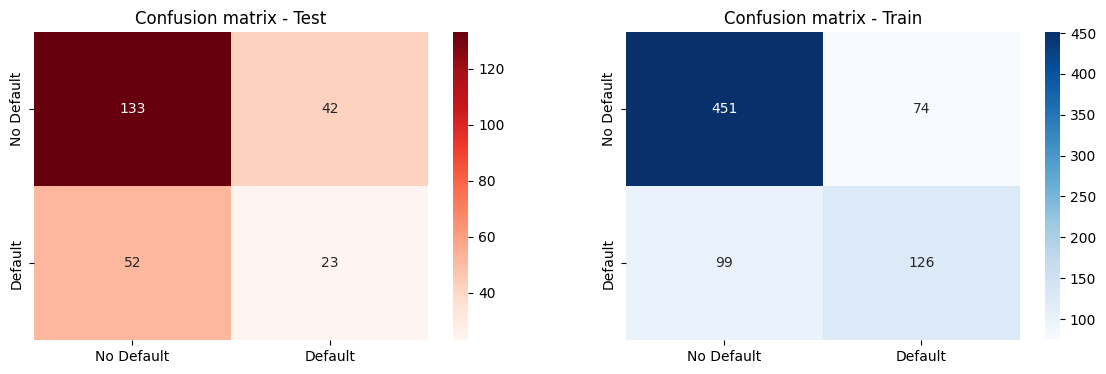

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
(conf_matrix_test_qda, conf_matrix_train_qda) = print_and_get_confusion_matrix_data(qda, X_train, X_test, y_train, y_test, "QDA")
plot_confusion_matrix(conf_matrix_test_qda, conf_matrix_train_qda, "QDA")


## Model 4: K-Nearest Neighbors (KNN)

k-NN was implemented with hyperparameter tuning for the k values.

Best Hyperparameters: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Best KNN - Training Set Performance:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       525
           1       0.34      0.12      0.17       225

    accuracy                           0.67       750
   macro avg       0.52      0.51      0.48       750
weighted avg       0.59      0.67      0.61       750

KNeighborsClassifier(n_neighbors=2, p=1) - Confusion Matrix (Training Set):
[[474  51]
 [199  26]]




Best KNN - Test Set Performance:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       175
           1       1.00      0.27      0.42        75

    accuracy                           0.78       250
   macro avg       0.88      0.63      0.64       250
weighted avg       0.83      0.78      0.73       250



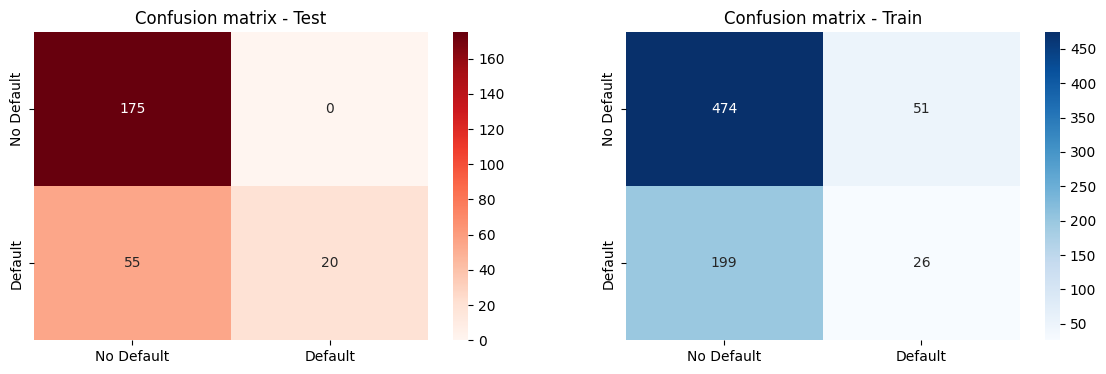

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [1, 2, 3, 5, 7],  # Example values, you can choose others
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is manhattan_distance and 2 is euclidean_distance
}

grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
best_knn.fit(X_test, y_test)
(conf_matrix_test_knn, conf_matrix_train_knn) = print_and_get_confusion_matrix_data(best_knn, X_train, X_test, y_train, y_test, "Best KNN")
plot_confusion_matrix(conf_matrix_test_knn, conf_matrix_train_knn, "Best KNN")



## Model 5: Decision Trees (DT)

Decision Trees were also implemented with cross validation for split values & max_depth limitation.

Best parameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier - Training Set Performance:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       525
           1       0.63      0.57      0.60       225

    accuracy                           0.77       750
   macro avg       0.73      0.71      0.72       750
weighted avg       0.77      0.77      0.77       750

DecisionTreeClassifier(max_depth=3) - Confusion Matrix (Training Set):
[[451  74]
 [ 97 128]]




DecisionTreeClassifier - Test Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.60      0.55      0.57        75

    accuracy                           0.76       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.75      0.76      0.75       250



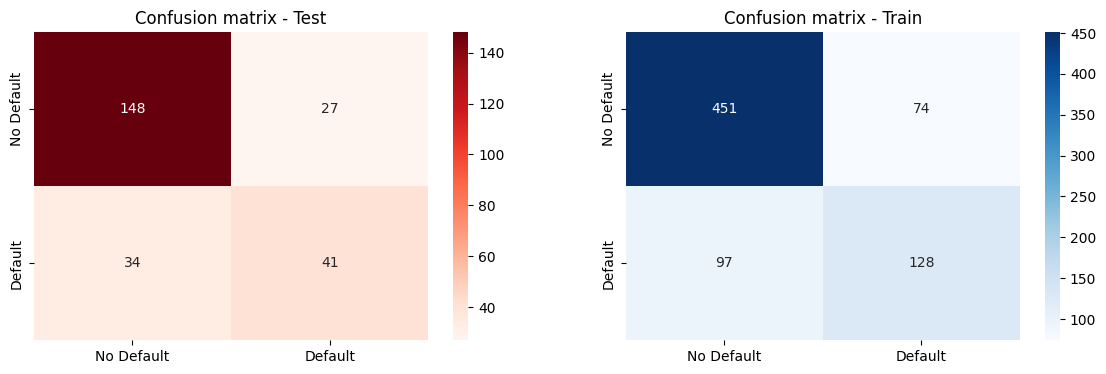

In [21]:
# Import the required packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Instantiate the classifier
dtree = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
# Train the final model with the best parameters
dst_best = DecisionTreeClassifier(**best_params)
dst_best.fit(X_train, y_train)

(conf_matrix_test_qda, conf_matrix_train_qda) = print_and_get_confusion_matrix_data(dst_best, X_train, X_test, y_train, y_test, "DecisionTreeClassifier")
plot_confusion_matrix(conf_matrix_test_qda, conf_matrix_train_qda, "DecisionTreeClassifier")


## Model 6: XGB

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.3, 0.4, 0.5, 0.6],
    'max_depth': [3, 4, 5, 6]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# Initialize XGBoost model with best hyperparameters
xgb_best = XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                         max_depth=best_max_depth,
                         random_state=42)

# Fit the model on the training data
xgb_best.fit(X_train, y_train)

Best hyperparameters:
n_estimators: 100
learning_rate: 0.5
max_depth: 5


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

XGBClassifier - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
      

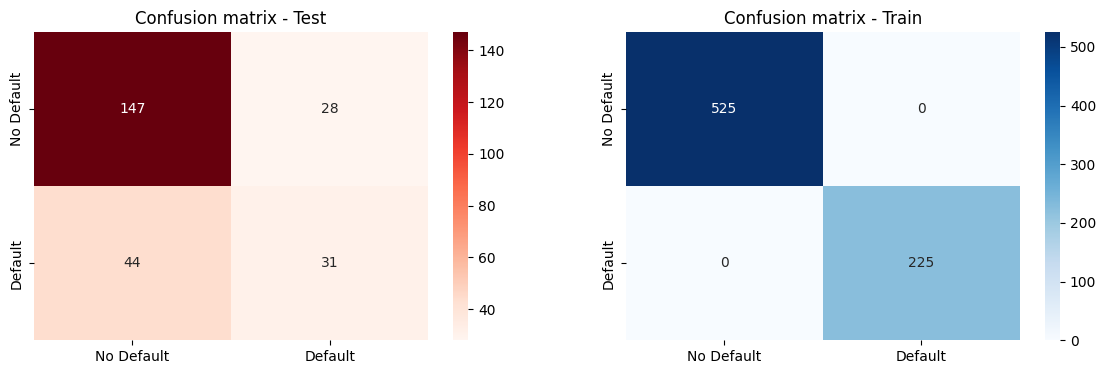

In [23]:
(conf_matrix_test_xgb, conf_matrix_train_xgb) = print_and_get_confusion_matrix_data(xgb_best, X_train, X_test, y_train, y_test, "XGBClassifier")
plot_confusion_matrix(conf_matrix_test_xgb, conf_matrix_train_xgb, "XGBClassifier")

## Model 7: ADA Boost

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.5, 0.6, 0.7, 0.8],
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)

# Initialize AdaBoost model with best hyperparameters
adaboost_best = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                   random_state=42)

# Fit the model on the training data
adaboost_best.fit(X_train, y_train)

/Users/ysingh/codebase/yatender-oktalk/machine-learning-arizona/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/ysingh/codebase/yatender-oktalk/machine-learning-arizona/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/ysingh/codebase/yatender-oktalk/machine-learning-arizona/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/ysingh/codebase/yatender-oktalk/machine-learning-arizona/.venv/lib/python3.11/site-p

Best hyperparameters:
n_estimators: 150
learning_rate: 0.6


/Users/ysingh/codebase/yatender-oktalk/machine-learning-arizona/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.6, n_estimators=150, random_state=42)

ADA Boost - Training Set Performance:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       525
           1       0.70      0.53      0.60       225

    accuracy                           0.79       750
   macro avg       0.76      0.72      0.73       750
weighted avg       0.78      0.79      0.78       750

AdaBoostClassifier(learning_rate=0.6, n_estimators=150, random_state=42) - Confusion Matrix (Training Set):
[[473  52]
 [105 120]]




ADA Boost - Test Set Performance:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       175
           1       0.54      0.39      0.45        75

    accuracy                           0.72       250
   macro avg       0.65      0.62      0.63       250
weighted avg       0.70      0.72      0.70       250



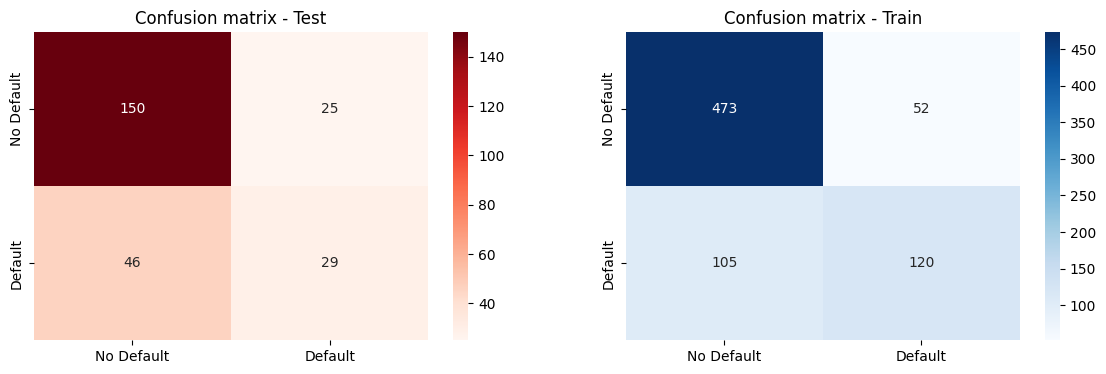

In [25]:
(conf_matrix_test_ada, conf_matrix_train_ada) = print_and_get_confusion_matrix_data(adaboost_best, X_train, X_test, y_train, y_test, "ADA Boost")
plot_confusion_matrix(conf_matrix_test_ada, conf_matrix_train_ada, "ADA Boost")

## Model 8: Random Forest

Best hyperparameters:
n_estimators: 450
max_depth: 20
min_samples_split: 4
Random Forest - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      0.99      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=450,
                       random_state=42) - Confusion Matrix (Training Set):
[[525   0]
 [  2 223]]




Random Forest - Test Set Performance:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       175
           1       0.63      0.36      0.46        75

    accuracy                           0.74       250
   macro avg       0.70      0.63      0.65       250
weighted avg       0.73      0.74      0.72       250



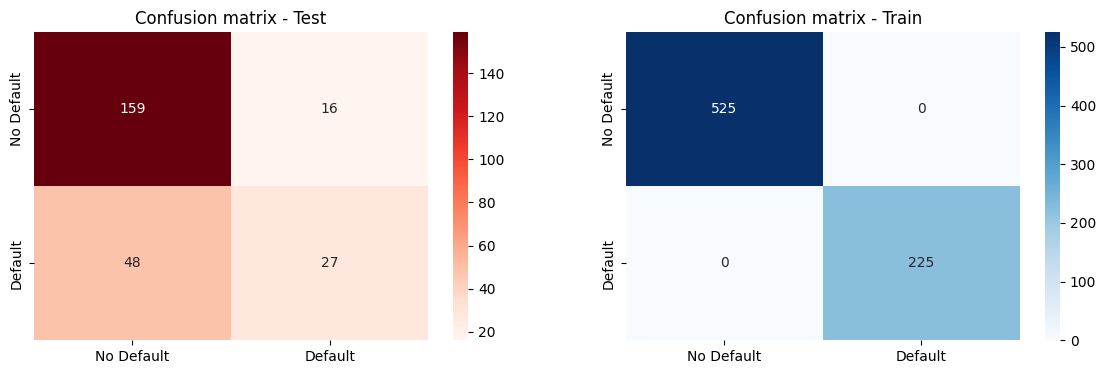

In [26]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV (with 'recall' scoring)
param_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': [None, 20],
    'min_samples_split': [2, 3, 4]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)

# Initialize Random Forest model with best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split,
                                            random_state=42)
random_forest_best.fit(X_train, y_train)
(conf_matrix_test_rf, conf_matrix_train_rf) = print_and_get_confusion_matrix_data(random_forest_best, X_train, X_test, y_train, y_test, "Random Forest")
plot_confusion_matrix(conf_matrix_test_rf, conf_matrix_train_xgb, "Random Forest")

## All Metrics

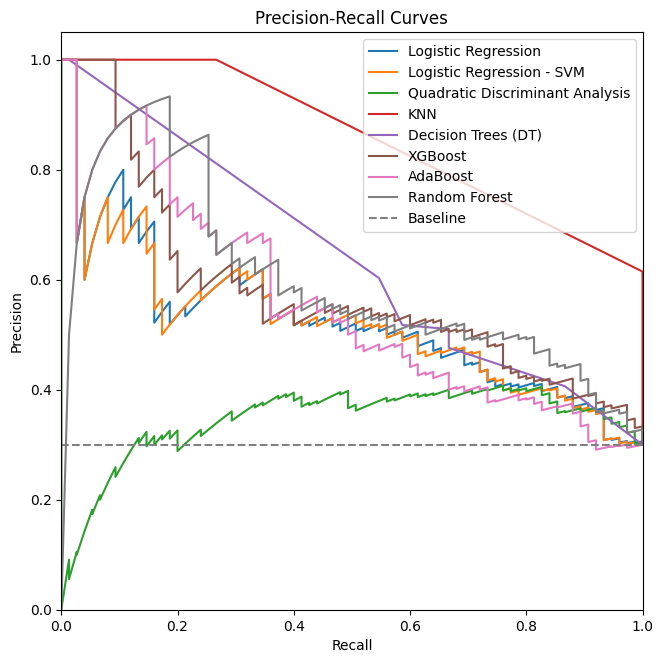

AUC-PR Values (Area Under the Curve in a Precision-Recall plot):
                          Model   AUC-PR
                            KNN 0.858743
            Decision Trees (DT) 0.639638
                  Random Forest 0.588208
                        XGBoost 0.577248
                       AdaBoost 0.552200
            Logistic Regression 0.522291
      Logistic Regression - SVM 0.519819
Quadratic Discriminant Analysis 0.343391


In [27]:
from sklearn.metrics import precision_recall_curve, auc

# List of all the model names
model_names = ['Logistic Regression', 'Logistic Regression - SVM', 'Quadratic Discriminant Analysis', 'KNN', 
               'Decision Trees (DT)', 'XGBoost', 'AdaBoost','Random Forest']

# List of corresponding fitted models
fitted_models = [logreg, best_logreg, qda, best_knn, dst_best, xgb_best, adaboost_best, random_forest_best]

# Dictionary to store precision-recall curve data and AUC-PR values
prc_data = {}
auc_pr_values = []

# Calculate precision-recall curve and AUC-PR for each model
for model_name, model in zip(model_names, fitted_models):
    # Calculate predicted probabilities for positive class

    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test)
        
    # Calculate precision-recall curve (i.e., precision and recall values at different threshold points)
    precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)
    
    # Calculate AUC-PR (i.e., area under the curve for each model)
    auc_pr = auc(recall, precision)
    auc_pr_values.append(auc_pr)
    
    # Store data in the dictionary
    prc_data[model_name] = {'precision': precision, 'recall': recall}

    

# Plot Precision-Recall curves for all models
plt.figure(figsize=(7.5, 7.5))
for model_name in model_names:
    plt.plot(prc_data[model_name]['recall'], prc_data[model_name]['precision'], label=model_name)

# Calculate the ratio of positive and negative samples in the test set
ratio_positives = len(y_test[y_test == 1]) / len(y_test)
ratio_negatives = 1 - ratio_positives

# Plot baseline curve (always predicting majority class)
plt.plot([0, 1], [ratio_positives, ratio_positives], linestyle='--', label='Baseline', color='gray')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# DataFrame for AUC-PR values
auc_pr_df = pd.DataFrame({'Model': model_names, 'AUC-PR': auc_pr_values})

# Sort DataFrame by AUC-PR in descending order
auc_pr_df = auc_pr_df.sort_values(by='AUC-PR', ascending=False)

# Display AUC-PR values
print("AUC-PR Values (Area Under the Curve in a Precision-Recall plot):")
print(auc_pr_df.to_string(index=False))


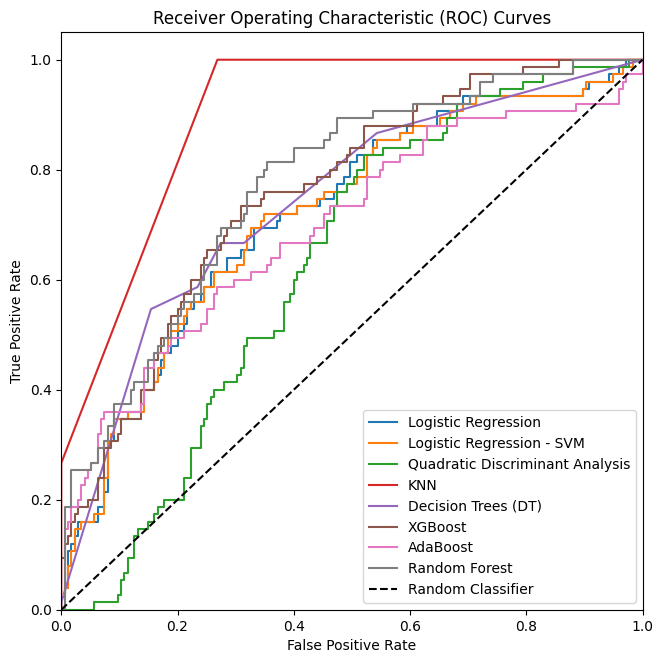

AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):
                          Model  AUC-ROC
                            KNN 0.901524
                  Random Forest 0.771733
                        XGBoost 0.755657
            Decision Trees (DT) 0.742171
            Logistic Regression 0.718476
      Logistic Regression - SVM 0.716800
                       AdaBoost 0.694933
Quadratic Discriminant Analysis 0.627276


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary to store ROC curve data and AUC-ROC values
roc_data = {}
auc_roc_values = []

# Calculate ROC curve and AUC-ROC for each model
for model_name, model in zip(model_names, fitted_models):
    # Calculate predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test)
        
    # Calculate ROC curve (i.e., false positive rate and true positive rate values)
    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
    
    # Calculate AUC-ROC (i.e., area under the curve for each model)
    auc_roc = roc_auc_score(y_test, predicted_probabilities)
    auc_roc_values.append(auc_roc)
    
    # Store data in the dictionary
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr}

    

# Plot ROC curves for all models
plt.figure(figsize=(7.5, 7.5))
for model_name in model_names:
    plt.plot(roc_data[model_name]['fpr'], roc_data[model_name]['tpr'], label=model_name)

# Plot the random classifier line (dashed)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# DataFrame for AUC-ROC values
auc_roc_df = pd.DataFrame({'Model': model_names, 'AUC-ROC': auc_roc_values})

# Sort DataFrame by AUC-ROC in descending order
auc_roc_df = auc_roc_df.sort_values(by='AUC-ROC', ascending=False)

# Display AUC-ROC values
print("AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):")
print(auc_roc_df.to_string(index=False))